#BA890 Individual Research Project


***Customer Personality Analysis***

Name: Chunxiaqiu Yang (Tommy)



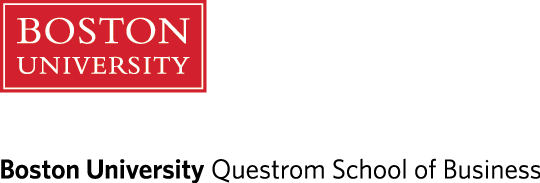

Table of Contents

1.   Project Proposal
2.   Import & Load Marketing Campaign Dataset
3.   Preprocess & Data Cleanning
4.   Exploratory data analysis
5.   Unsupervised Machine learning
6.   Summary & Limitations



## 1: Project Proposal

###Business Problem & Project Description
The research shows if the company deals with every customer in the same way, it will close 25 percent to 30 percent of the contacts. Understanding the personalities of customers can help the company better manage and advertise its product and service. Also, it will give the company a competitive edge in the market. In general, companies differentiate customers into
four segments, including thinkers, drivers, expressive, and feelers. Each segment differs in how they process information and responds to advertising.
> 
The motivation for this project stemmed from analyzing customers’ personal information such as age, education, income, and buying preference, which creates artificial customer segmentations. The project will determine customers’ specific needs, behaviors, and concerns to help companies modify and balance their budget by not maximizing advertising campaigns.

### Dataset

https://www.kaggle.com/imakash3011/customer-personality-analysis

The dataset I am going to use is Customer Personality Analysis- Analysis of the company's ideal customers, which is downloaded from Kaggle. The dataset includes basic information for customers, such as age, marriage status, income, and education. It also contains how much customers spend on groceries and whether they accept the offer from the last campaigns. The dataset consists of 2241 records of customers’ information and buying decisions. 29 features with a mixture of data types. For example, string, categorical, and numerical variables. The following table shows some relevant attributes I am going to focus on in the analysis.

 Important Attributes Analysis
1.   ID: Customer's unique ID
2.   Year_Birth: Customer's Date of birth (year)
3.   Education: Customer's education level
4.   Marital_Status: Customer's marital status
5.   Income: Customer's yearly income
6.   Kidhome: Number of children in customer's household
7.   Teenhome: Number of teenagers in customer's household
8.   Dt_Customer: Date of customer's enrollment with the company
9.   Recency: Number of days since customer's last purchase
10.  Complain: 1 if the customer complained in the last 2 years, 0 otherwise
11.  MntWines: Amount spent on wine in last 2 years
12.  MntFruits: Amount spent on fruits in last 2 years
13.  MntMeatProducts: Amount spent on meat in last 2 years
14.  MntFishProducts: Amount spent on fish in last 2 years
15.  MntSweetProducts: Amount spent on sweets in last 2 years
16.  MntGoldProds: Amount spent on gold in last 2 years
17.  NumDealsPurchases: Number of purchases made with a discount
18.  AcceptedCmp: 1 if accepted the offer in the campaign, 0 otherwise
19.  Response: 1 if accepted the offer in the last campaign, 0 otherwise



### Proposed Analysis methodology

I will be focusing on unsupervised machine learning to discover natural patterns in different customer segmentations. In addition, I will also apply supervised machine learning for predictive analysis on the dataset.



1.   Data Processing
I. Check and replace any missing values in the dataset
II. Standardize unit scale
III. Adjust different value types.
III. Clean irrelevant features/attributes.
2.   Unsupervised Machine Learning
I. Dimension reduction (PCA, UMAP, TSNE) if needed
II. K-Means & Hierarchical Clustering
III. Neural Networks (if avaliable) for Classification, compared with K-means and
Hierarchical classification, identify the most appropriate clusters.
IV. Cluster profiling and find insights behind these values.




## 2: Import & Load Marketing Campaign Dataset

In [ ]:
!pip install scikit-plot
!pip install mlxtend

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from sklearn.preprocessing import StandardScaler
import plotly.express as px  
from mlxtend.frequent_patterns import apriori, association_rules
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import pdist, squareform

# sklearn does have some functionality too, but mostly a wrapper to scipy
from sklearn.metrics import pairwise_distances

from sklearn.cluster import KMeans, DBSCAN
from sklearn.neighbors import NearestNeighbors

from sklearn import metrics 
from sklearn.datasets import make_blobs
import scikitplot as skplt
from datetime import datetime
from sklearn.decomposition import PCA



# color maps
from matplotlib import cm


In [ ]:
#Read the Marketing_Campaign dataset from the github
url = "https://raw.githubusercontent.com/ChunxiaqiuY/BA890_Individual_Project/main/Marketing_Campaign_Final.csv"
df = pd.read_csv(url)
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0      4/9/12       58       635  ...                  7             0   
1      8/3/14       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3     10/2/14       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [ ]:
#info() to check the basic information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
#Check the basic statistical information of the dataset
df.describe()

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    23.750000     1.000000        16.000000   
50%      49.000000   173.500000     8.000000        67.000000   
75%      74.000000   504.250000    33.000000       232.000000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  ...  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count      2240.000000  ...        2240.000000   2240.000000   2240.000000   
mean         37.525446  ...           5.316518      0.072768      0.074554   
std          54.628979  ...           2.426645      0.259813      0.262728   
min           0.000000  ...           0.000000      0.000000      0.000000   
25%           3.000000  ...           3.000000      0.000000      0.000000   
50%          12.000000  ...           6.000000      0.000000      0.000000   
75%          50.000000  ...           7.000000      0.000000      0.000000   
max         259.000000  ...          20.000000      1.000000      1.000000   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  \
count   2240.000000   2240.000000   2240.000000  2240.000000         2240.0   
mean       0.072768      0.064286      0.013393     0.009375            3.0   
std        0.259813      0.245316      0.114976     0.096391            0.0   
min        0.000000      0.000000      0.000000     0.000000            3.0   
25%        0.000000      0.000000      0.000000     0.000000            3.0   
50%        0.000000      0.000000      0.000000     0.000000            3.0   
75%        0.000000      0.000000      0.000000     0.000000            3.0   
max        1.000000      1.000000      1.000000     1.000000            3.0   

       Z_Revenue     Response  
count     2240.0  2240.000000  
mean        11.0     0.149107  
std          0.0     0.356274  
min         11.0     0.000000  
25%         11.0     0.000000  
50%         11.0     0.000000  
75%         11.0     0.000000  
max         11.0     1.000000  

[8 rows x 26 columns]

## 3: Preprocess & Data Cleaning

The dataset consists of 2292 rows and 29 columns, each row represents a unique customer with different attributes, such as age, income, and purchase performance. There are 24 missing values in the income feature, I replace the missing value with the average. In order to identify the customers' personalities, I added two new columns: "Enrollment period: how many years since the customer has enrolled" and "spent: total spend". I also separate the date to year, month and day. Finally, I drop the unused columns and set the customer ID as the index.

In [ ]:
#Check the missing value in the dataset
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [ ]:
#Replace the 24 missing income with the average
income_array = df.Income.dropna().to_numpy()
average_income = np.average(income_array)
df.Income = df.Income.fillna(average_income)

In [ ]:
#Reset the index and drop the id column
df.index = df.ID
del df['ID']

In [ ]:
#Drop the unused column
del df["Z_CostContact"]
del df["Z_Revenue"]

In [ ]:
#Check unique values for the education level
df.Education.unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [ ]:
#Check unique values for the marritial status
df.Marital_Status.unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [ ]:
#Replace the categorical feature 'Education' with numerical values
df.Education.replace(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], [0,1,2,3,4], inplace = True)

In [ ]:
#Replace the categorical feature 'Education' with numerical values
df['Marital_Status'].replace(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone', 'Absurd', 'YOLO'], [0,1,2,3,4,5,6,7], inplace = True)

In [ ]:
#convert date to datetime, create three columns for the year, month and day
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df['DT_year'] = df['Dt_Customer'].dt.year
df['DT_month'] = df['Dt_Customer'].dt.month
df['DT_day'] = df['Dt_Customer'].dt.day
del df["Dt_Customer"]

In [ ]:
#Create a new column to store the period since the custome enrolled 
df["Period"] = 2022 - df['DT_year']
#Create a new columne to calculate the total spending for customers
df["Spent"]= df["MntWines"]+df["MntFruits"]+df["MntFishProducts"]+df["MntMeatProducts"]+df["MntSweetProducts"]+df["MntGoldProds"]
#Create a new column to calculate the age for each customers
df["age"] = datetime.now().year-df["Year_Birth"]

In [ ]:
df.head()

Year_Birth  Education  Marital_Status   Income  Kidhome  Teenhome  \
ID                                                                        
5524        1957          0               0  58138.0        0         0   
2174        1954          0               0  46344.0        1         1   
4141        1965          0               1  71613.0        0         0   
6182        1984          0               1  26646.0        1         0   
5324        1981          1               2  58293.0        1         0   

      Recency  MntWines  MntFruits  MntMeatProducts  ...  AcceptedCmp1  \
ID                                                   ...                 
5524       58       635         88              546  ...             0   
2174       38        11          1                6  ...             0   
4141       26       426         49              127  ...             0   
6182       26        11          4               20  ...             0   
5324       94       173         43              118  ...             0   

      AcceptedCmp2  Complain  Response  DT_year  DT_month  DT_day  Period  \
ID                                                                          
5524             0         0         1     2012         4       9      10   
2174             0         0         0     2014         8       3       8   
4141             0         0         0     2013         8      21       9   
6182             0         0         0     2014        10       2       8   
5324             0         0         0     2014         1      19       8   

      Spent  age  
ID                
5524   1617   65  
2174     27   68  
4141    776   57  
6182     53   38  
5324    422   41  

[5 rows x 31 columns]

In [ ]:
df.describe().T

count          mean           std     min       25%  \
Year_Birth           2240.0   1968.805804     11.984069  1893.0   1959.00   
Education            2240.0      0.982143      1.257276     0.0      0.00   
Marital_Status       2240.0      1.496875      1.073864     0.0      1.00   
Income               2240.0  52247.251354  25037.797168  1730.0  35538.75   
Kidhome              2240.0      0.444196      0.538398     0.0      0.00   
Teenhome             2240.0      0.506250      0.544538     0.0      0.00   
Recency              2240.0     49.109375     28.962453     0.0     24.00   
MntWines             2240.0    303.935714    336.597393     0.0     23.75   
MntFruits            2240.0     26.302232     39.773434     0.0      1.00   
MntMeatProducts      2240.0    166.950000    225.715373     0.0     16.00   
MntFishProducts      2240.0     37.525446     54.628979     0.0      3.00   
MntSweetProducts     2240.0     27.062946     41.280498     0.0      1.00   
MntGoldProds         2240.0     44.021875     52.167439     0.0      9.00   
NumDealsPurchases    2240.0      2.325000      1.932238     0.0      1.00   
NumWebPurchases      2240.0      4.084821      2.778714     0.0      2.00   
NumCatalogPurchases  2240.0      2.662054      2.923101     0.0      0.00   
NumStorePurchases    2240.0      5.790179      3.250958     0.0      3.00   
NumWebVisitsMonth    2240.0      5.316518      2.426645     0.0      3.00   
AcceptedCmp3         2240.0      0.072768      0.259813     0.0      0.00   
AcceptedCmp4         2240.0      0.074554      0.262728     0.0      0.00   
AcceptedCmp5         2240.0      0.072768      0.259813     0.0      0.00   
AcceptedCmp1         2240.0      0.064286      0.245316     0.0      0.00   
AcceptedCmp2         2240.0      0.013393      0.114976     0.0      0.00   
Complain             2240.0      0.009375      0.096391     0.0      0.00   
Response             2240.0      0.149107      0.356274     0.0      0.00   
DT_year              2240.0   2013.028125      0.684554  2012.0   2013.00   
DT_month             2240.0      6.520089      3.512696     1.0      3.00   
DT_day               2240.0     15.585714      8.834884     1.0      8.00   
Period               2240.0      8.971875      0.684554     8.0      9.00   
Spent                2240.0    605.798214    602.249288     5.0     68.75   
age                  2240.0     53.194196     11.984069    26.0     45.00   

                         50%       75%       max  
Year_Birth            1970.0   1977.00    1996.0  
Education                0.0      2.00       4.0  
Marital_Status           2.0      2.00       7.0  
Income               51741.5  68289.75  666666.0  
Kidhome                  0.0      1.00       2.0  
Teenhome                 0.0      1.00       2.0  
Recency                 49.0     74.00      99.0  
MntWines               173.5    504.25    1493.0  
MntFruits                8.0     33.00     199.0  
MntMeatProducts         67.0    232.00    1725.0  
MntFishProducts         12.0     50.00     259.0  
MntSweetProducts         8.0     33.00     263.0  
MntGoldProds            24.0     56.00     362.0  
NumDealsPurchases        2.0      3.00      15.0  
NumWebPurchases          4.0      6.00      27.0  
NumCatalogPurchases      2.0      4.00      28.0  
NumStorePurchases        5.0      8.00      13.0  
NumWebVisitsMonth        6.0      7.00      20.0  
AcceptedCmp3             0.0      0.00       1.0  
AcceptedCmp4             0.0      0.00       1.0  
AcceptedCmp5             0.0      0.00       1.0  
AcceptedCmp1             0.0      0.00       1.0  
AcceptedCmp2             0.0      0.00       1.0  
Complain                 0.0      0.00       1.0  
Response                 0.0      0.00       1.0  
DT_year               2013.0   2013.00    2014.0  
DT_month                 6.0     10.00      12.0  
DT_day                  16.0     23.00      31.0  
Period                   9.0      9.00      10.0  
Spent                  396.

## 4: Exploratory data analysis

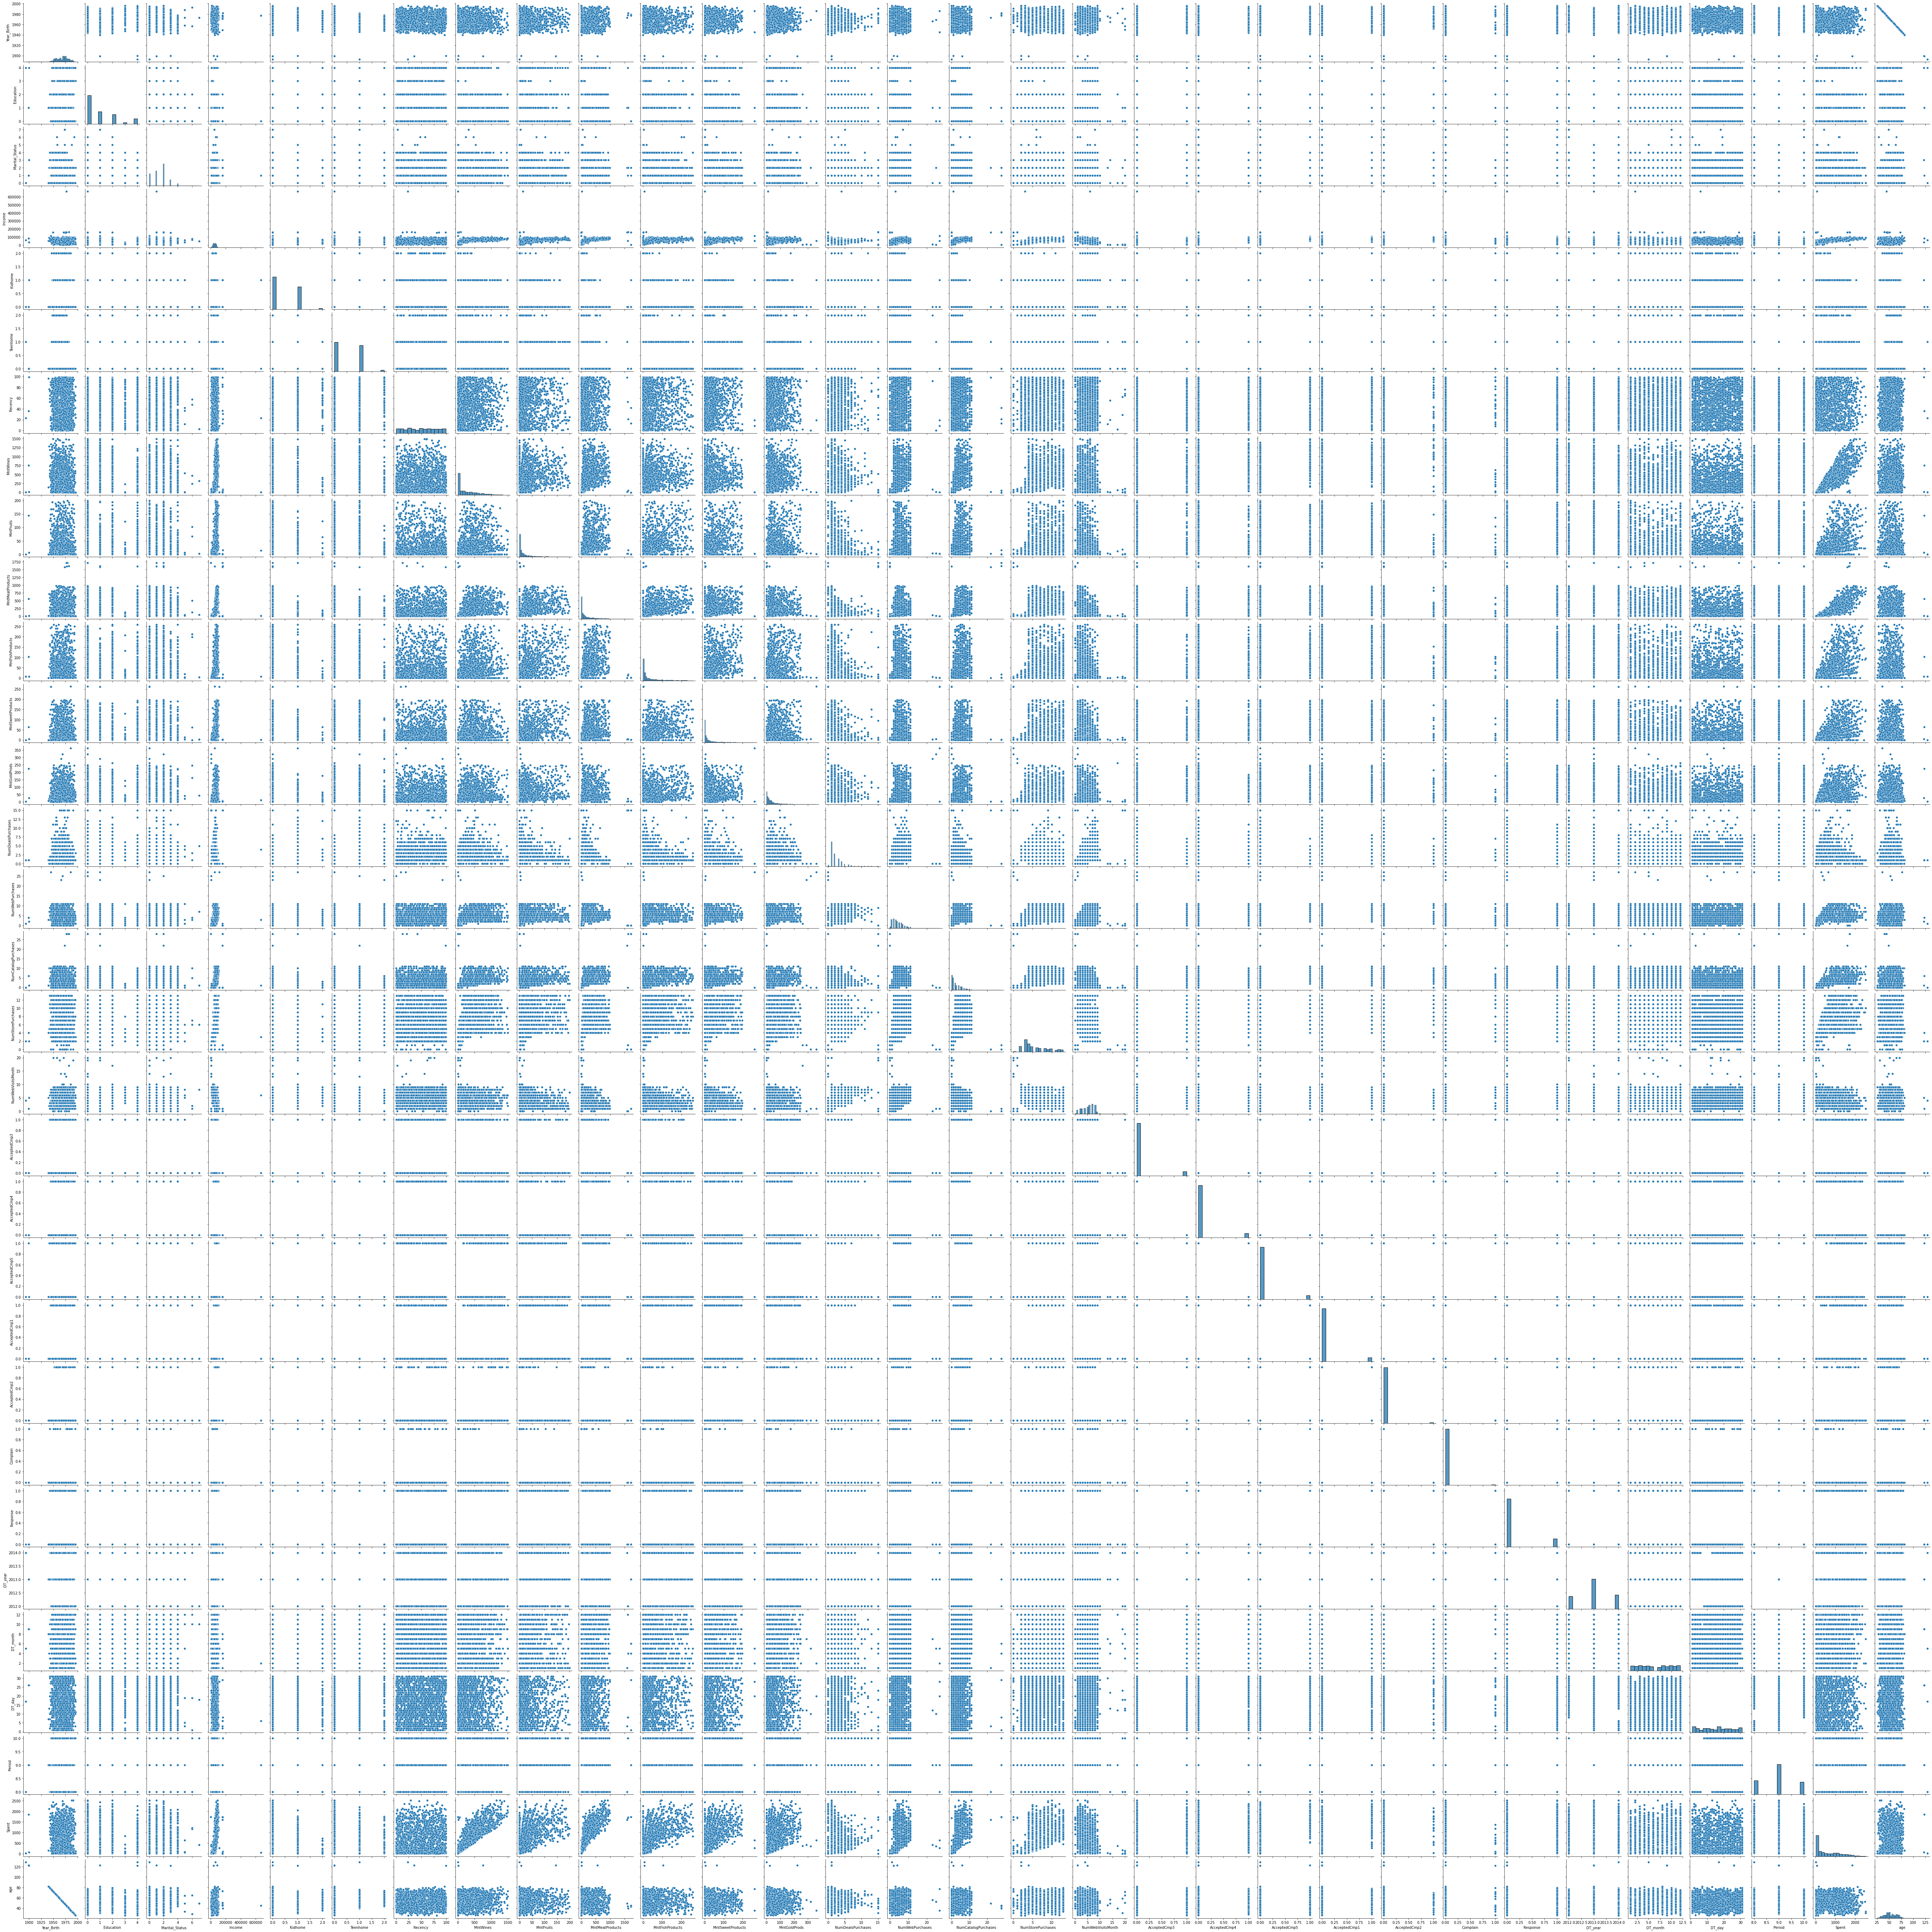

In [ ]:
#reate a grid of Axes such that each numeric variable in data will by shared across the 
#y-axes across a single row and the x-axes across a single column
sns.pairplot(df)

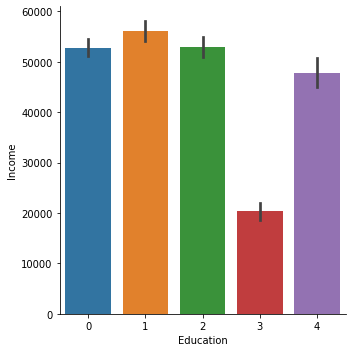

In [ ]:
#Find aaverage income with different level of education
sns.catplot(data = df, y = 'Income', x = 'Education', kind = 'bar')

As you can see the graph shown above, the education level 1 (Phd) has the highest average Income, while the average income for education level 3 (Basic) is much lower than other levels. 

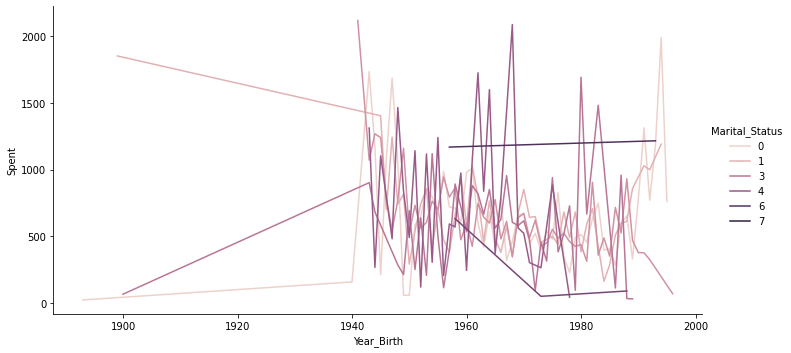

In [ ]:
#Find the yearly average income with different marital status
#Recall ['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone', 'Absurd', 'YOLO'] replace with [0,1,2,3,4,5,6,7]
yearly_Income = df.groupby(['Year_Birth', 'Marital_Status']).agg({'Spent':'mean'})
sns.relplot(kind='line', data = yearly_Income, x = 'Year_Birth', y = 'Spent', hue = 'Marital_Status', aspect =2 )

The graph shows that people stay togther would result in a large amount of spending. However, the data also indicates that single person has increased their spending over years.

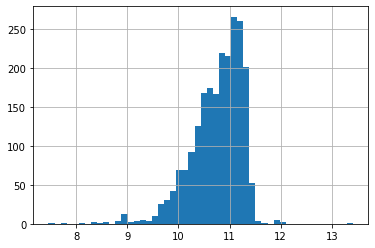

In [ ]:
#Find the distribution of the income, use log() to avoid large ranges
goal = df.copy()
goal['log_Income'] = np.log(df['Income'])
goal['log_Income'].hist(bins = 50)

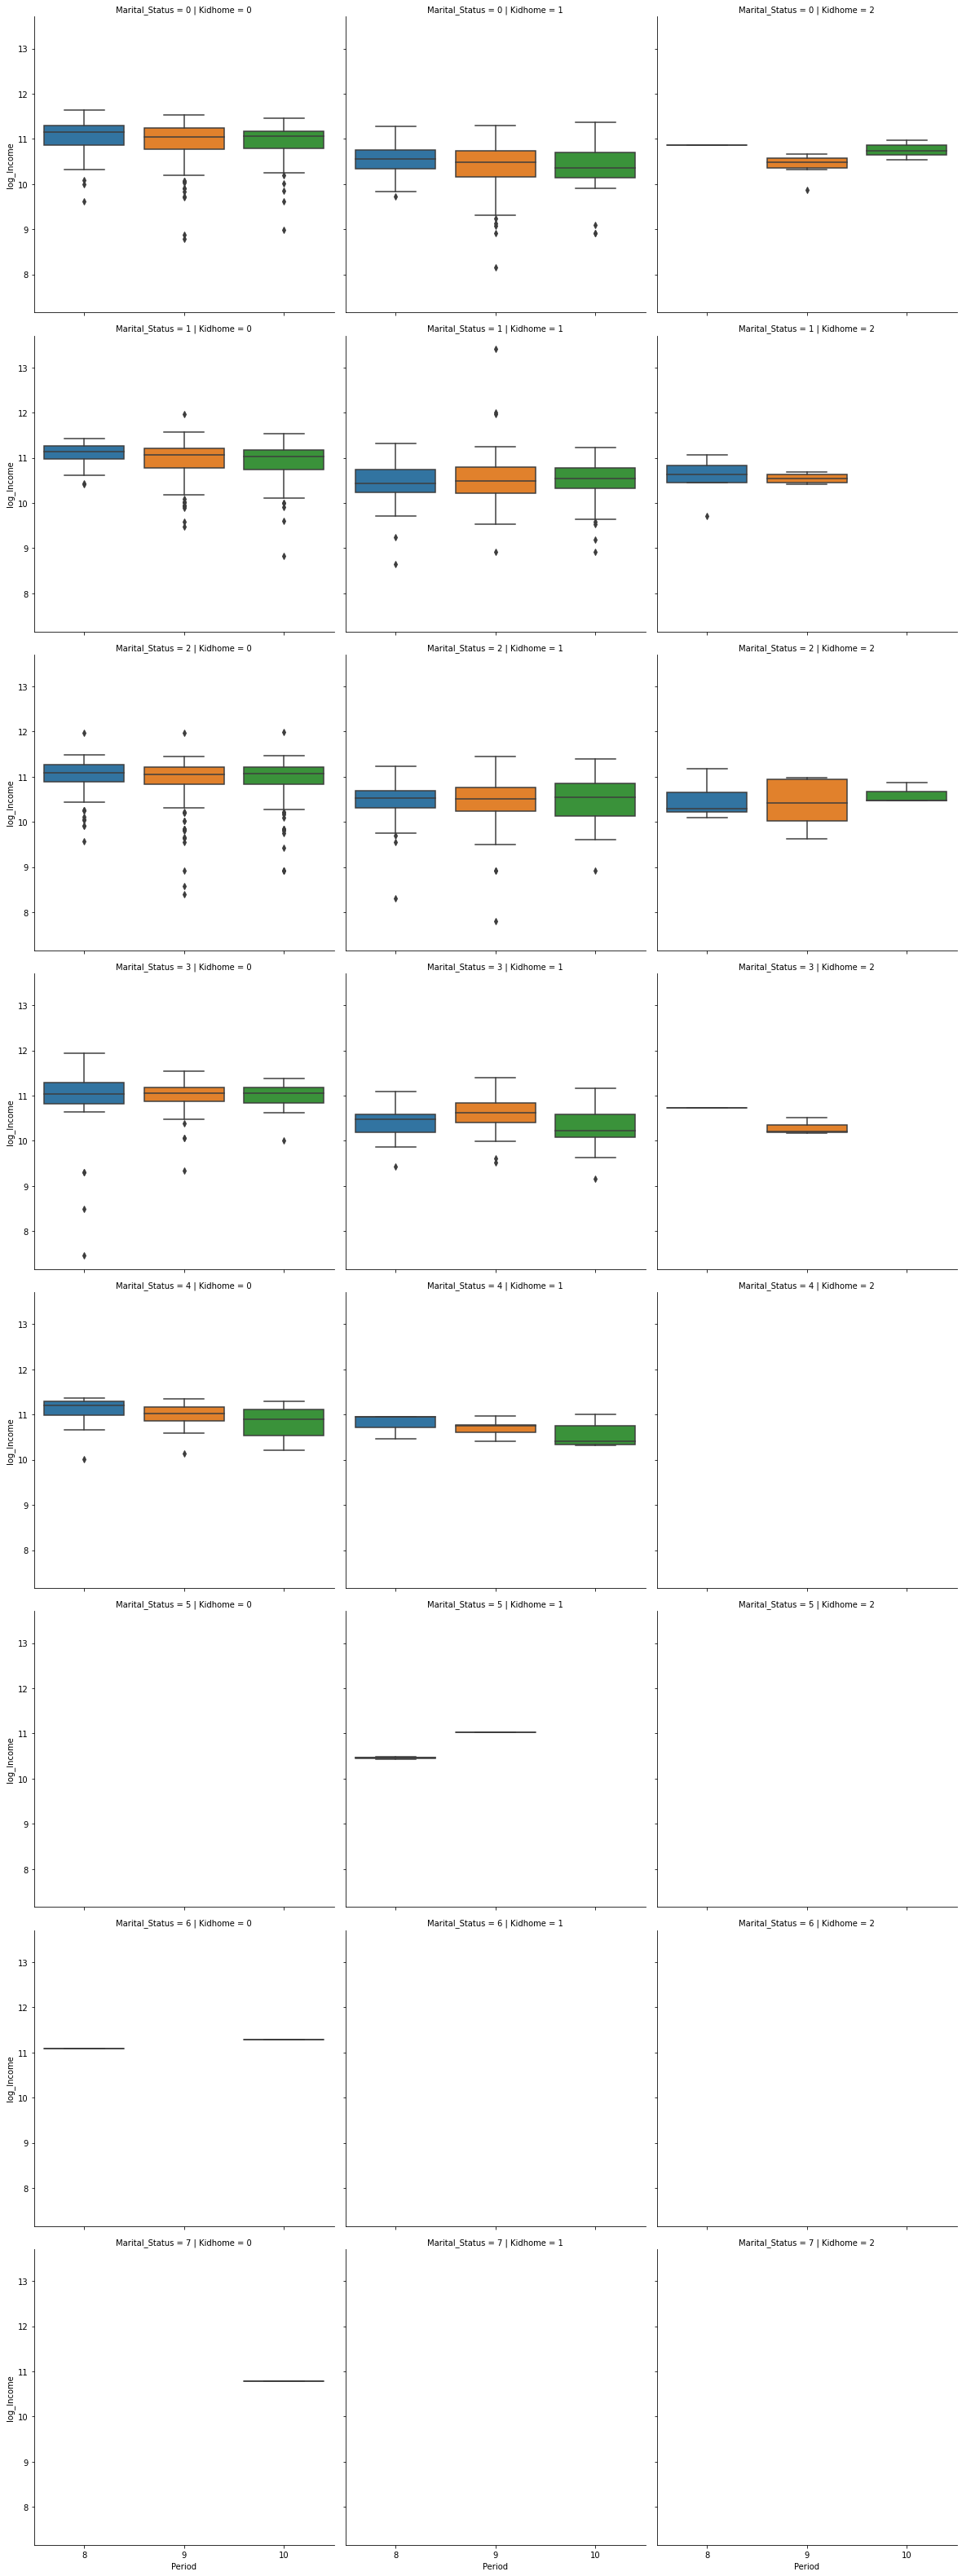

In [ ]:
#Boxplot of log income with different marital status and how many kids in home.
sns.catplot(data=goal, x = 'Period', y = 'log_Income', height = 5.5,
            row = 'Marital_Status', col = 'Kidhome', kind = 'box')

In [ ]:
corr = df.apply(lambda x: pd.factorize(x)[0]).corr()
#ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels==corr.columns, linewidths=0.2, cmap='YlGnBu')

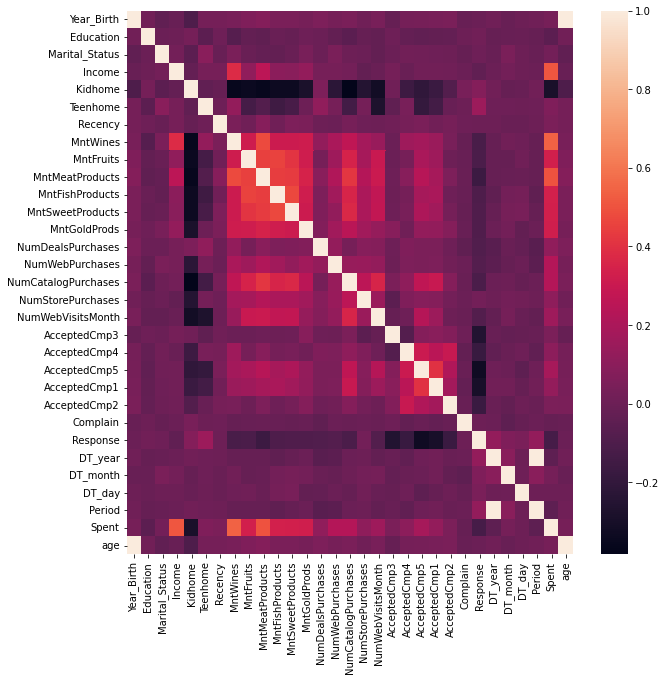

In [ ]:
plt.figure(figsize=(10,10))
ax = sns.heatmap(corr)

We can see most of variables are highly correlated with each other, for example, the amount spend on meet/fish/sweet products have correlation about (0.6-0.8)

## 5: Unsupervised learning: Classification

In [ ]:
#Print out the head of the dataframe
df.head()

Year_Birth  Education  Marital_Status   Income  Kidhome  Teenhome  \
ID                                                                        
5524        1957          0               0  58138.0        0         0   
2174        1954          0               0  46344.0        1         1   
4141        1965          0               1  71613.0        0         0   
6182        1984          0               1  26646.0        1         0   
5324        1981          1               2  58293.0        1         0   

      Recency  MntWines  MntFruits  MntMeatProducts  ...  AcceptedCmp1  \
ID                                                   ...                 
5524       58       635         88              546  ...             0   
2174       38        11          1                6  ...             0   
4141       26       426         49              127  ...             0   
6182       26        11          4               20  ...             0   
5324       94       173         43              118  ...             0   

      AcceptedCmp2  Complain  Response  DT_year  DT_month  DT_day  Period  \
ID                                                                          
5524             0         0         1     2012         4       9      10   
2174             0         0         0     2014         8       3       8   
4141             0         0         0     2013         8      21       9   
6182             0         0         0     2014        10       2       8   
5324             0         0         0     2014         1      19       8   

      Spent  age  
ID                
5524   1617   65  
2174     27   68  
4141    776   57  
6182     53   38  
5324    422   41  

[5 rows x 31 columns]

In [ ]:
#check the size of the dataframe
df.shape

(2240, 31)

In [ ]:
#Standardlize the unit
scaler = StandardScaler()
escaled = scaler.fit_transform(df)

In [ ]:
#Create a new dataframe based on the standardlized values
df_scaled = pd.DataFrame(escaled, columns=df.columns, index=df.index)
df_scaled.head(3)

Year_Birth  Education  Marital_Status    Income   Kidhome  Teenhome  \
ID                                                                          
5524   -0.985345  -0.781341       -1.394226  0.235327 -0.825218 -0.929894   
2174   -1.235733  -0.781341       -1.394226 -0.235826  1.032559  0.906934   
4141   -0.317643  -0.781341       -0.462802  0.773633 -0.825218 -0.929894   

       Recency  MntWines  MntFruits  MntMeatProducts  ...  AcceptedCmp1  \
ID                                                    ...                 
5524  0.307039  0.983781   1.551577         1.679702  ...     -0.262111   
2174 -0.383664 -0.870479  -0.636301        -0.713225  ...     -0.262111   
4141 -0.798086  0.362723   0.570804        -0.177032  ...     -0.262111   

      AcceptedCmp2  Complain  Response   DT_year  DT_month    DT_day  \
ID                                                                     
5524      -0.11651 -0.097282  2.388846 -1.502225 -0.717583 -0.745588   
2174      -0.11651 -0.097282 -0.418612  1.420036  0.421397 -1.424866   
4141      -0.11651 -0.097282 -0.418612 -0.041094  0.421397  0.612967   

        Period     Spent       age  
ID                                  
5524  1.502225  1.679417  0.985345  
2174 -1.420036 -0.961275  1.235733  
4141  0.041094  0.282673  0.317643  

[3 rows x 31 columns]

### Hierarchical clustering



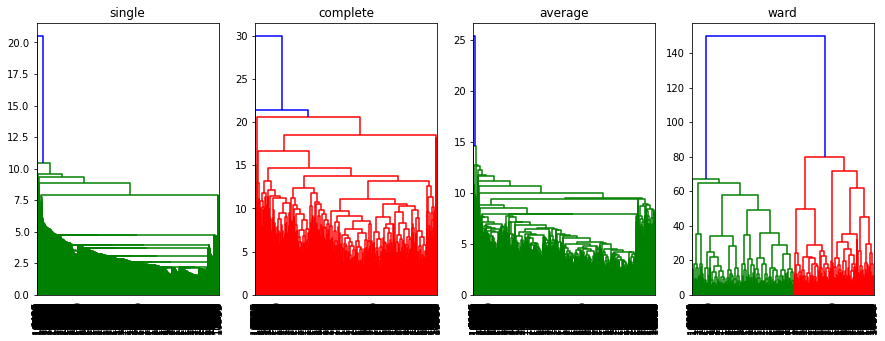

In [ ]:
#Create a grid graph shows the four different linkage methods of Hierarchical clustering
METHODS = ['single', 'complete', 'average', 'ward']
plt.figure(figsize=(15,5))


# loop and build our plot
for i, m in enumerate(METHODS):
  plt.subplot(1, 4, i+1)
  plt.title(m)
  dendrogram(linkage(df_scaled.values, method=m),
             labels = df_scaled.index,
             leaf_rotation=90,
             leaf_font_size=10)
  
plt.show()

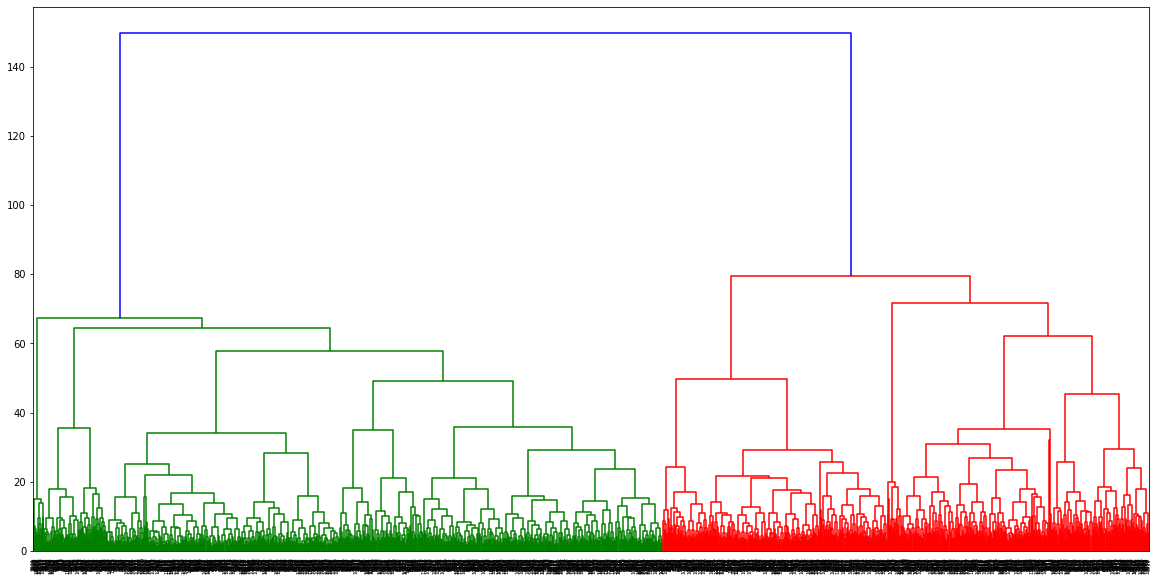

In [ ]:
#Choose 'ward' method - 
hc1 = linkage(escaled, method = 'ward')
plt.figure(figsize=(20,10))
dendrogram(hc1,labels=df.index)
plt.show()

###K-Means Clustering

In [ ]:
#create an empty list to store the different values of sum of squared distance of samples to its closest cluster centers
s = []
#Use for loop to try different values of K, figure out different sum of squared distances.
for i in range(2,20):
  kx = KMeans(i)
  lab = kx.fit_predict(df_scaled)
  s.append(kx.inertia_)
s

[56343.11076468819,
 52404.36353460976,
 49813.87592068774,
 47774.52219063489,
 45769.762268898325,
 44753.505493886034,
 42574.43069459287,
 41925.24328972588,
 41022.89865622256,
 39846.850874327785,
 39082.48768650867,
 38393.63560321379,
 37721.2198537232,
 37101.11195807169,
 36670.391621122224,
 36155.95966424144,
 35538.47406183409,
 35041.91608919014]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


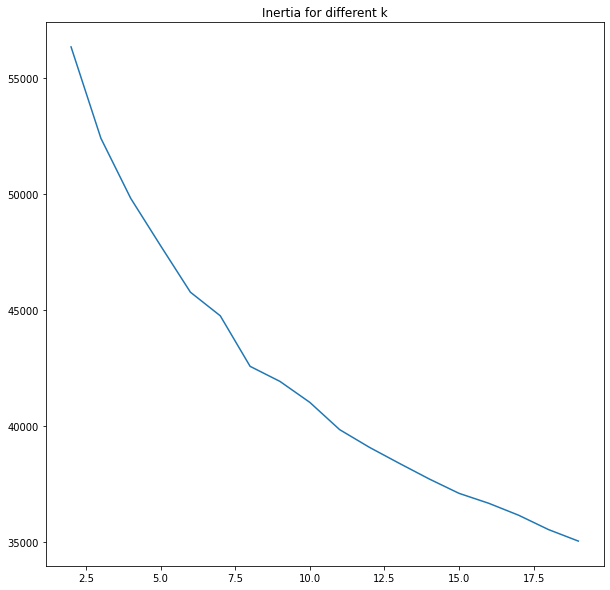

In [ ]:
#plot the ssd, use the elbow method to determine the most appropriate k
plt.figure(figsize=(10,10))
plt.title("Inertia for different k")
sns.lineplot(range(2,20), s)

In [ ]:
# minimize inertia, and maximize silhouette via selection of k, I used Elbow method and choose k = 8
k8 = KMeans(8)
k8.fit(df_scaled)

KMeans()

In [ ]:
#create labels for k = 10
labs = k8.predict(df_scaled)
labs

array([6, 1, 6, ..., 0, 5, 2], dtype=int32)

In [ ]:
##Applied labels to the dataset
draft = df_scaled.copy()
draft['k_8'] = labs
df['k_8'] = labs
draft.head()

Year_Birth  Education  Marital_Status    Income   Kidhome  Teenhome  \
ID                                                                          
5524   -0.985345  -0.781341       -1.394226  0.235327 -0.825218 -0.929894   
2174   -1.235733  -0.781341       -1.394226 -0.235826  1.032559  0.906934   
4141   -0.317643  -0.781341       -0.462802  0.773633 -0.825218 -0.929894   
6182    1.268149  -0.781341       -0.462802 -1.022732  1.032559 -0.929894   
5324    1.017761   0.014206        0.468623  0.241519  1.032559 -0.929894   

       Recency  MntWines  MntFruits  MntMeatProducts  ...  AcceptedCmp2  \
ID                                                    ...                 
5524  0.307039  0.983781   1.551577         1.679702  ...      -0.11651   
2174 -0.383664 -0.870479  -0.636301        -0.713225  ...      -0.11651   
4141 -0.798086  0.362723   0.570804        -0.177032  ...      -0.11651   
6182 -0.798086 -0.870479  -0.560857        -0.651187  ...      -0.11651   
5324  1.550305 -0.389085   0.419916        -0.216914  ...      -0.11651   

      Complain  Response   DT_year  DT_month    DT_day    Period     Spent  \
ID                                                                           
5524 -0.097282  2.388846 -1.502225 -0.717583 -0.745588  1.502225  1.679417   
2174 -0.097282 -0.418612  1.420036  0.421397 -1.424866 -1.420036 -0.961275   
4141 -0.097282 -0.418612 -0.041094  0.421397  0.612967  0.041094  0.282673   
6182 -0.097282 -0.418612  1.420036  0.990888 -1.538079 -1.420036 -0.918094   
5324 -0.097282 -0.418612  1.420036 -1.571819  0.386541 -1.420036 -0.305254   

           age  k_8  
ID                   
5524  0.985345    6  
2174  1.235733    1  
4141  0.317643    6  
6182 -1.268149    3  
5324 -1.017761    3  

[5 rows x 32 columns]

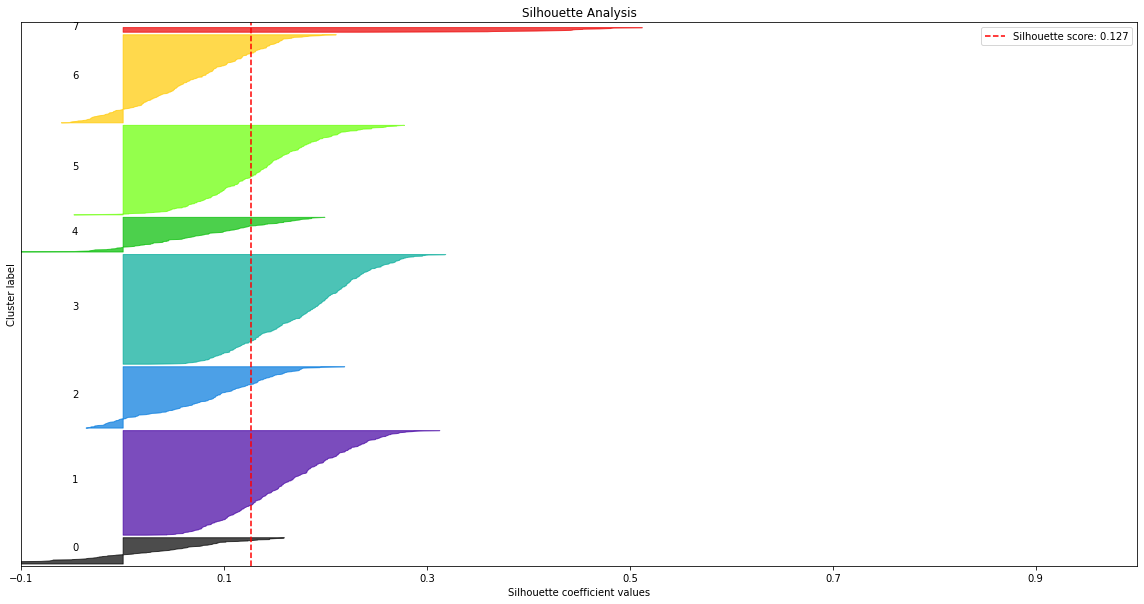

In [ ]:
#generate the silohouette plot for the solution
skplt.metrics.plot_silhouette(draft,labs, figsize=(20,10))

In order to differeniate customers to unique personalities, I used the K-Mean method to partition the observations into k clusters. As you can see the graph above, I created an empty list to record the inertia and the average silhouette score for different values of the k. The inertia decreases as the number of cluster increases. To choose the best performing cluster k, I minimize the inertia and maximize the silhouette score and find the optimal number of cluster around the Elbow point, which is around 7 and 8.

### Profiling Analysis

After the K-Mean clustering, the 2240 unique customers can be assigned into 8 clusters. Each cluster represents a unique personality. The following table shows the statistical summary for the result.

In [ ]:
#Group by the cluster and take a look at the insights.
k_profile = draft.groupby("k_8").mean()
k_profiles = df.groupby("k_8").mean()
k_profiles

Year_Birth  Education  Marital_Status        Income   Kidhome  Teenhome  \
k_8                                                                             
0    1964.929825   0.850877        1.692982  63570.958345  0.140351  0.771930   
1    1961.270510   1.002217        1.563193  46119.570426  0.516630  0.933481   
2    1973.064151   1.037736        1.475472  33936.359439  0.784906  0.486792   
3    1978.484144   1.175476        1.359408  31328.598320  0.915433  0.099366   
4    1969.993333   0.933333        1.473333  82632.970018  0.040000  0.053333   
5    1963.839378   0.870466        1.642487  60081.979940  0.176166  0.953368   
6    1968.676316   0.850000        1.418421  75364.703954  0.044737  0.163158   
7    1965.095238   1.000000        1.285714  45242.285714  0.666667  0.523810   

       Recency    MntWines  MntFruits  MntMeatProducts  ...  AcceptedCmp1  \
k_8                                                     ...                 
0    51.491228  735.789474  16.228070       136.105263  ...      0.184211   
1    50.949002   95.793792   6.126386        33.376940  ...      0.008869   
2    46.147170   83.030189   8.822642        45.113208  ...      0.000000   
3    48.319239   32.211416   5.682875        24.575053  ...      0.000000   
4    46.480000  838.533333  63.080000       521.206667  ...      0.486667   
5    48.531088  521.015544  28.126943       170.082902  ...      0.023316   
6    50.668421  489.613158  74.871053       456.907895  ...      0.097368   
7    53.047619  169.000000  24.190476       112.476190  ...      0.000000   

     AcceptedCmp2  Complain  Response      DT_year  DT_month     DT_day  \
k_8                                                                       
0        0.201754       0.0  0.307018  2012.973684  6.614035  16.236842   
1        0.004435       0.0  0.013304  2013.412417  6.022173  14.682927   
2        0.000000       0.0  0.218868  2012.173585  8.954717  17.807547   
3        0.000000       0.0  0.086681  2013.350951  5.723044  15.376321   
4        0.033333       0.0  0.593333  2013.106667  6.660000  13.860000   
5        0.000000       0.0  0.116580  2012.779793  6.484456  15.795337   
6        0.000000       0.0  0.150000  2013.013158  6.413158  15.655263   
7        0.000000       1.0  0.142857  2012.857143  5.523810  15.333333   

       Period        Spent        age  
k_8                                    
0    9.026316   975.736842  57.070175  
1    8.587583   165.554324  60.729490  
2    9.826415   187.837736  48.935849  
3    8.649049    91.202960  43.515856  
4    8.893333  1660.900000  52.006667  
5    9.220207   868.756477  58.160622  
6    8.986842  1278.402632  53.323684  
7    9.142857   376.428571  56.904762  

[8 rows x 31 columns]

([<matplotlib.patches.Wedge at 0x7f22d7979c90>,
 [Text(1.0859702244052583, 0.17512473184902538, 'Personality 0'),
  Text(0.637795998743641, 0.896223333765977, 'Personality 1'),
  Text(-0.41381495210065644, 1.0191943805859272, 'Personality 2'),
  Text(-1.0876371538700265, 0.16445492246055987, 'Personality 3'),
  Text(-0.8243054229042936, -0.7283684299656141, 'Personality 4'),
  Text(-0.10474775426696206, -1.0950013278421302, 'Personality 5'),
  Text(0.9128987734351475, -0.6136903367828138, 'Personality 6'),
  Text(1.0995229389352064, -0.03239300472766483, 'Personality 7')],
 [Text(0.5923473951301408, 0.0955225810085593, '5%'),
  Text(0.3478887265874405, 0.4888490911450783, '20%'),
  Text(-0.22571724660035802, 0.5559242075923237, '12%'),
  Text(-0.5932566293836506, 0.08970268497848718, '21%'),
  Text(-0.4496211397659783, -0.3972918708903349, '7%'),
  Text(-0.05713513869107021, -0.5972734515502528, '17%'),
  Text(0.49794478551008037, -0.3347401836997166, '17%'),
  Text(0.5997397848737489,

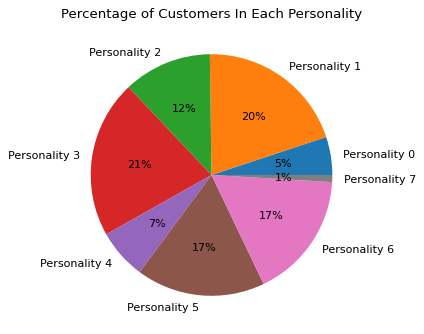

In [ ]:
#compute counts
labels = ['Personality 0', 'Personality 1', 'Personality 2', 'Personality 3','Personality 4', 'Personality 5', 'Personality 6', 'Personality 7']
counts = []
for i in range(8):
  counts.append(len(df[df["k_8"]==i]))

plt.figure(figsize=(15, 5), dpi=80)
plt.rcParams.update({'axes.grid': False})

#pie plot
ax1 = plt.subplot2grid((1,2),(0,0))
ax1.set_title("Percentage of Customers In Each Personality")
plt.pie(counts, labels = labels, autopct='%.0f%%')

The pie charts illustrates the customer percentage for each personality. The personality 3 has the largest population, which is about 21%. while personality 5 and 6 have the same amount of customers. personality 7 only counts for 1%

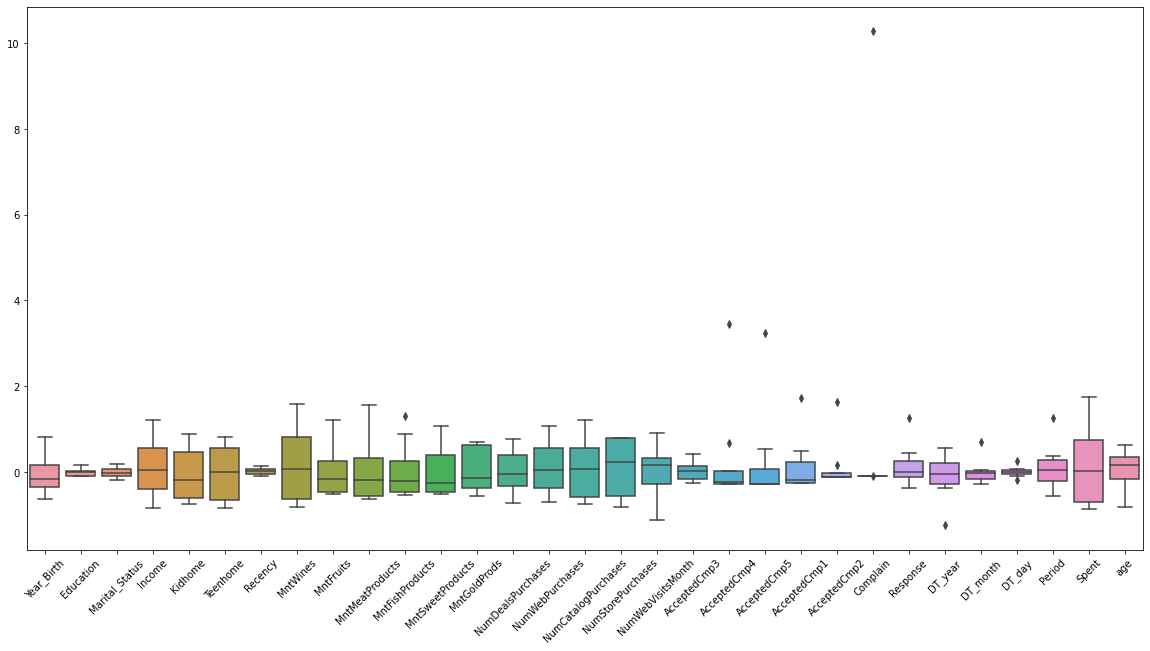

In [ ]:
#create a boxplot for the k_profile
plt.figure(figsize=(20,10))
plt.xticks(rotation = 45)
sns.boxplot(data = k_profile)

In [ ]:
#define a function to show values on the barplot
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

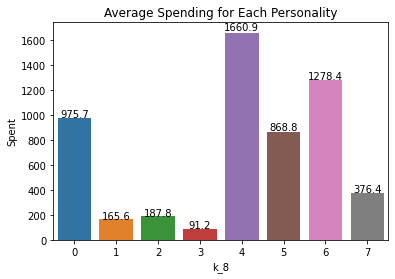

In [ ]:
#Average spending for each personality
sp = sns.barplot(y=k_profiles["Spent"], x = k_profiles.index)
sp.set_title('Average Spending for Each Personality')
show_values(sp)

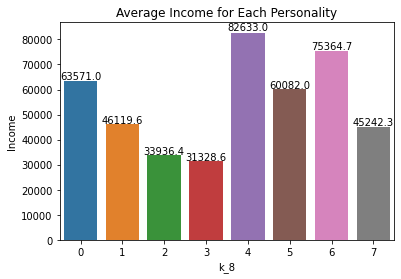

In [ ]:
#Average spending for each personality
ic = sns.barplot(y=k_profiles["Income"], x = k_profiles.index)
ic.set_title('Average Income for Each Personality')
show_values(ic)

Combine with the average income and spending level, we can see the personality 3 has the lowest spending (91.2) and income (31328.6), while personality 4 has the highest spending (1660.9) and income (82633). The income level for personality 1 is above the average, however their average spending per month is about 165.6, which is much lower than the average. 

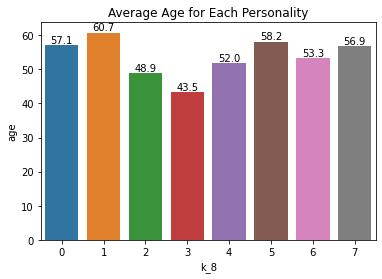

In [ ]:
#Average for each personality
ax = sns.barplot(y=k_profiles["age"], x = k_profiles.index)
ax.set(title='Average Age for Each Personality')
show_values(ax)

The personality 1 has the highest average age, which is about 60.7. we can explain why the personality 1 earn more but spend less. Also, the personality 3 has the lowest average age (43.5), which can help us understand why personality3 has the lowest income and avereage spending.

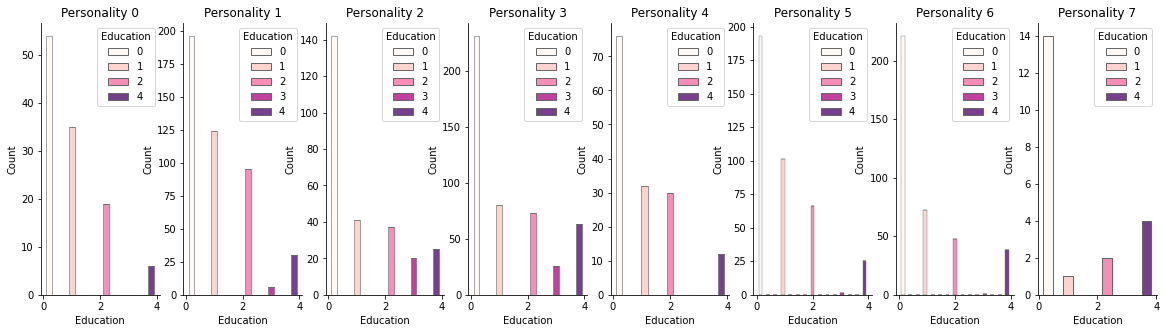

In [ ]:
plt.figure(figsize=(20, 5))
#Recall that ['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'] replace with [0,1,2,3,4]
#plotting a histogram of education level count in each bin
for i in range(8):
  ax1 = plt.subplot2grid((1,8),(0,i))
  ax1.set_title("Personality "+str(i))
  sns.histplot(
      df[df["k_8"]==i],
      x="Education",
      hue= "Education",
      multiple="stack",
      palette="RdPu",
      edgecolor=".4",
      shrink= .5
  )
  sns.despine()

In [ ]:
#Recall that ['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'] replace with [0,1,2,3,4]

The graph above shows education level for each personality. Personality 3 has the largest percentage of graduation. Personality 1 has the largest percentage of phd and master. There are only 14 graduation and 1 phd in personality 7.

## 6: Summary 

Overall, I use the K-Mean clustering configuration to categorize a total of 2240 customers. The customers can be segmented into 8 personalities. Personality 1 has the highest average age, which is about 60.7. customers within this personality prefer to save money (earn more but spend less), and also they have the highest education level. For this personality, I will recommend sellers and vendors target cost-effective products. Personality 3 has the lowest average, which is around 43.5. Customers within this personality have the lowest average spending (91.2) and income (31328.6). I will recommend vendors perform promotions towards these customers. Personality 4 has the highest spending (1660.9) and income (82633), I will recommend vendors target Luxury products for these customers.


The dataset only consists of 2240 unique customers, and the average age is above 40 years old. There is a significant bias in different ages. when we differentiate customers' personalities, it is necessary to take teenages' and young adults' purchase preferences into consideration. In addition, the size of the dataset (amount of customers) is not big enough, and the accuracy of the results can not be guaranteed with a small dataset. Furthermore, when we apply the k mean clustering method, the number of k can be arbitrary. Even though we use the inertia and the average silhouette score to determine the elbow point, we can not guarantee the elbow point represent the most appropriate k. In the future, I can add more clustering methods such as KNN and DBSCAN to determine the most appropriate k. In addition, I will search for a larger customer dataset to avoid bias in the sample.